In [1]:
import modin.pandas as pd     
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

from imblearn.over_sampling import SMOTE

from pycaret.classification import *

pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('archive/train.csv')
test = pd.read_csv('archive/test.csv')

In [3]:
X = data.drop('y', axis=1)
y = data['y']

In [4]:
data.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1,18,19,2853,29442,1386,2435,35,-999,3,63,6498,1166,2007,26,13,11,11,4,1547,26,2068,1,3,0,4,7,0,24,4,2,0,16,3,44,463,27,2,0,4,9,3,25,6,1,4,3,1,0,0,0,0,42,1,1,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,8,4,110,1986,13684,7189,-999,-999,17,3,63,13989,497,2289,16,1,3,3,3,1797,16,2417,5,1,2,1,6,1,4,2,1,0,14,0,1,532,2,1,0,4,7,3,30,3,0,0,0,0,0,0,0,0,20,1,1,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,30,0,39,1019,10232,678,791,16,-999,3,63,9739,562,641,10,34,34,10,4,511,10,664,5,3,2,1,7,0,3,4,1,0,11,1,3,81,26,3,0,4,3,3,23,5,1,0,0,0,0,0,0,0,12,1,1,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,43,20,39,1751,2689,8235,1042,13,10,1,14,2890,6541,811,8,59,60,23,5,624,8,839,0,0,0,0,1,1,19,1,2,0,8,0,11,414,27,0,0,4,10,3,22,10,1,1,1,0,1,1,0,0,36,1,1,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,46,7,44,2262,29428,6031,304,16,-999,3,63,13541,7238,260,10,55,56,20,5,1413,10,270,2,3,2,1,8,1,3,4,1,0,17,4,3,567,8,3,2,4,5,3,26,5,1,0,0,0,0,1,0,0,19,1,1,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1


In [4]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [5]:
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [6]:
data_resampled.columns

Index(['id', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8',
       'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16',
       'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24',
       'var25', 'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32',
       'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39', 'var40',
       'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48',
       'var49', 'var50', 'var51', 'var52', 'var53', 'var54', 'var55', 'var56',
       'var57', 'var58', 'var59', 'var60', 'var61', 'var62', 'var63', 'var64',
       'var65', 'var66', 'var67', 'var68', 'y'],
      dtype='object')

In [7]:
lista = ['id', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8',
       'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16',
       'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24',
       'var25', 'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32',
       'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39', 'var40',
       'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48',
       'var49', 'var50', 'var51', 'var52', 'var53', 'var54', 'var55', 'var56',
       'var57', 'var58', 'var59', 'var60', 'var61', 'var62', 'var63', 'var64',
       'var65', 'var66', 'var67', 'var68']

In [8]:
setup = setup(data=data_resampled, target='y', train_size=0.7, 
            verbose=True, remove_outliers=True, 
            session_id=42, outliers_threshold=0.15,
            numeric_features=lista)

,Description,Value
0,session_id,42
1,Target,y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(22546, 70)"
5,Missing Values,False
6,Numeric Features,69
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
best_model = compare_models(fold=5, exclude=['xgboost'], sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9190,0.9708,0.9017,0.9463,0.9234,0.8377,0.8388,12.8260
lightgbm,Light Gradient Boosting Machine,0.9164,0.9705,0.9028,0.9404,0.9212,0.8322,0.8330,0.4800
rf,Random Forest Classifier,0.9114,0.9682,0.9021,0.9323,0.9169,0.8222,0.8228,0.7620
gbc,Gradient Boosting Classifier,0.9094,0.9642,0.8979,0.9324,0.9148,0.8182,0.8190,1.9140
et,Extra Trees Classifier,0.9070,0.9634,0.8967,0.9290,0.9125,0.8132,0.8139,0.6060
ada,Ada Boost Classifier,0.8990,0.9583,0.8893,0.9215,0.9050,0.7972,0.7979,0.4360
dt,Decision Tree Classifier,0.8383,0.8360,0.8639,0.8416,0.8526,0.6736,0.6740,0.1220
ridge,Ridge Classifier,0.8326,0.0000,0.8304,0.8561,0.8430,0.6639,0.6643,0.0580
lda,Linear Discriminant Analysis,0.8314,0.9026,0.8293,0.8548,0.8419,0.6613,0.6617,0.1740
knn,K Neighbors Classifier,0.7775,0.8574,0.9103,0.7392,0.8158,0.5425,0.5616,0.5280


In [10]:
model = create_model('lightgbm', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9083,0.9666,0.9050,0.9241,0.9144,0.8158,0.8160
1,0.9136,0.9679,0.8994,0.9382,0.9184,0.8266,0.8274
2,0.9173,0.9674,0.8994,0.9450,0.9217,0.8342,0.8353
3,0.9173,0.9733,0.8939,0.9502,0.9212,0.8343,0.8361
4,0.9187,0.9701,0.9105,0.9376,0.9238,0.8367,0.8372
5,0.9165,0.9735,0.9105,0.9336,0.9219,0.8322,0.8325
6,0.9269,0.9773,0.9229,0.9410,0.9318,0.8531,0.8533
7,0.9336,0.9775,0.9174,0.9583,0.9374,0.8669,0.8678
8,0.9165,0.9710,0.9036,0.9398,0.9213,0.8324,0.8331
9,0.9135,0.9688,0.8912,0.9459,0.9177,0.8267,0.8283


In [11]:
tuned_model = tune_model(model, n_iter=10, search_library='scikit-optimize', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9135,0.9694,0.9022,0.9357,0.9187,0.8264,0.8271
1,0.9206,0.9739,0.8981,0.9525,0.9245,0.8410,0.8426
2,0.9128,0.9725,0.9036,0.9331,0.9181,0.8249,0.8254
3,0.9307,0.9780,0.9180,0.9521,0.9348,0.8608,0.8615
4,0.9198,0.9709,0.9008,0.9485,0.9241,0.8393,0.8405
Mean,0.9195,0.9730,0.9045,0.9444,0.9240,0.8385,0.8394
SD,0.0064,0.0029,0.0070,0.0083,0.0060,0.0129,0.0130


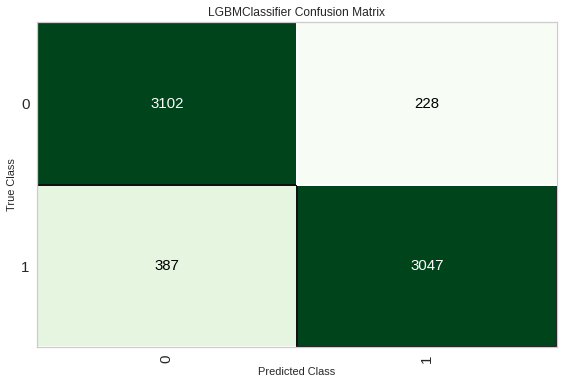

In [12]:
plot_model(model, plot='confusion_matrix')

In [13]:
predict_model(tuned_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9114,0.9686,0.8867,0.9355,0.9104,0.8230,0.8241


In [15]:
final_model = finalize_model(tuned_model)

[LightGBM] [Warning] bagging_fraction is set=0.887437593014418, subsample=1.0 will be ignored. Current value: bagging_fraction=0.887437593014418
[LightGBM] [Warning] feature_fraction is set=0.7588282465072769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7588282465072769
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.887437593014418, subsample=1.0 will be ignored. Current value: bagging_fraction=0.887437593014418
[LightGBM] [Warning] feature_fraction is set=0.7588282465072769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7588282465072769
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.887437593014418, subsample=1.0 will be ignored. Current value: bagging_fraction=0.887437593014418
[LightGBM] [Warning] feature_fraction is 

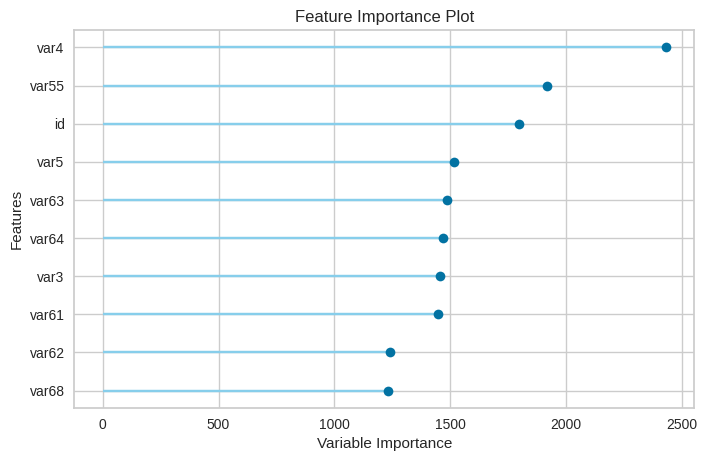

In [37]:
plot_model(final_model, plot='feature')

In [17]:
pred = predict_model(final_model, test)

In [18]:
sub_pred = pred[['id', 'Label']]

In [19]:
names_columns = {
    'id': 'id', 
    'Label': 'predicted'
}
sub_pred = sub_pred.rename(columns=names_columns)

In [20]:
sub_pred.to_csv('submission/04.csv', index=False)